In [1]:
#Project1 

# Python Project - To Predict Consumer Complaint Resolution
## Method Used - Classification
## Model Used -  Logistic Regression
## Target Variable - 'Consumer disputed?'
## Language/IDE Used - Jupyter Notebook
## Aim - AUC Score should be greater than 0.54

In [2]:
# Importing Libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split,KFold
import seaborn as sns
sns.set(style="ticks",color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Reading Data

datafile_train=r'C:\Users\Monica\Desktop\Projects\Python Projects 1\Project 1\Data_for_Project_1\Consumer_Complaints_train.csv'
datafile_test=r'C:\Users\Monica\Desktop\Projects\Python Projects 1\Project 1\Data_for_Project_1\Consumer_Complaints_test_share.csv'
cd_train=pd.read_csv(datafile_train)
cd_test=pd.read_csv(datafile_test)

In [4]:
# Understanding Data

In [5]:
cd_train.dtypes  # display datatypes of each column 
# 18 columns are there and out of that 17 columns are string characters and one numeric

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object

In [6]:
cd_test.dtypes      # 17 columns are there and out of that 16 are string characters and one numeric 

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Complaint ID                     int64
dtype: object

In [7]:
cd_train.shape      # display number of rows and columns

(478421, 18)

In [8]:
cd_train.columns  # display all column names 

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

AttributeError: 'AxesSubplot' object has no attribute 'pltshow'

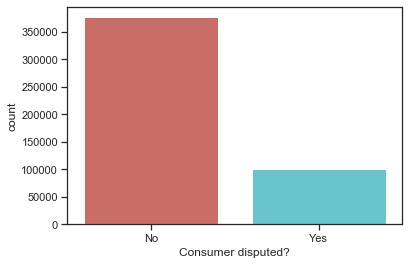

In [11]:
sns.countplot(x='Consumer disputed?',data=cd_train,palette='hls').pltshow()
#pictorial representation of target data

In [12]:
#cd_test does not have outcome variable - in order to combine the two we will need to add the response variable to cd_test
# so that also number of columns should be same or matching in order to combine

# cd_test['Consumer disputed?']=np.nan

In [13]:
# cd_train['Consumer disputed?'].value_counts() 

In [14]:
# Data Cleaning

In [15]:
# Now, starts data preprocessing or conversion 

In [16]:
# Analyze each feature (convert to numeric, drop, create dummies)

In [17]:
# converting string/object datatype to datetime datatype

for col in ['Date received','Date sent to company']:
    cd_train[col]=pd.to_datetime(cd_train[col],infer_datetime_format=True)
    cd_test[col]=pd.to_datetime(cd_test[col],infer_datetime_format=True)

In [18]:
# finding the gap between and converting to numeric datatype

cd_train['day_diff']=pd.to_numeric(cd_train['Date sent to company']-cd_train['Date received'])
cd_test['day_diff']=pd.to_numeric(cd_test['Date sent to company']-cd_test['Date received'])

In [19]:
# dropping these two date columns

for col in ['Date received','Date sent to company']:
    cd_train.drop([col],1,inplace=True)
    cd_test.drop([col],1,inplace=True)

In [20]:
# displays unique categories for each string/object datatype columns

for col in cd_train.select_dtypes(['object']).columns:
    print(col,':',cd_train[col].nunique())

Product : 12
Sub-product : 47
Issue : 95
Sub-issue : 68
Consumer complaint narrative : 74019
Company public response : 10
Company : 3276
State : 62
ZIP code : 25962
Tags : 3
Consumer consent provided? : 4
Submitted via : 6
Company response to consumer : 7
Timely response? : 2
Consumer disputed? : 2


In [21]:
cd_train.isnull().sum()                                     # finding missing/null values 

Product                              0
Sub-product                     138473
Issue                                0
Sub-issue                       292625
Consumer complaint narrative    403327
Company public response         388029
Company                              0
State                             3839
ZIP code                          3848
Tags                            411215
Consumer consent provided?      342934
Submitted via                        0
Company response to consumer         0
Timely response?                     0
Consumer disputed?                   0
Complaint ID                         0
day_diff                             0
dtype: int64

In [22]:
len(pd.isnull(cd_train['Tags']))

478421

In [23]:
len(cd_train)

478421

In [24]:
#cd_train['Sub-product'].nunique()

In [25]:
# imputing missing values by replacing new column names and replacing values with 1's and 0's


for col in ['Sub-product','Sub-issue','Consumer complaint narrative',
            'Company public response','Tags','Consumer consent provided?']:
    varname=col.replace('-','_').replace('?','').replace(" ",'_')+'_isNan'
    cd_train[varname]=np.where(pd.isnull(cd_train[col]),1,0)
    cd_train.drop([col],1,inplace=True)
    
    cd_test[varname]=np.where(pd.isnull(cd_test[col]),1,0)
    cd_test.drop([col],1,inplace=True)

In [26]:
cd_train.head(4)

,Product,Issue,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,day_diff,Sub_product_isNan,Sub_issue_isNan,Consumer_complaint_narrative_isNan,Company_public_response_isNan,Tags_isNan,Consumer_consent_provided_isNan
0,Credit card,Billing statement,Wells Fargo & Company,MI,48342,Web,Closed with explanation,Yes,No,856103,86400000000000,1,1,1,1,0,1
1,Bank account or service,"Making/receiving payments, sending money",Santander Bank US,PA,18042,Referral,Closed,Yes,No,1034666,518400000000000,0,1,1,1,1,1
2,Credit reporting,Incorrect information on credit report,Equifax,CA,92427,Referral,Closed with non-monetary relief,Yes,No,756363,1814400000000000,1,0,1,1,1,1
3,Credit card,Billing statement,U.S. Bancorp,GA,305XX,Web,Closed with monetary relief,Yes,No,1474177,0,1,1,0,0,0,0


In [27]:
# showing unique categories 


for col in cd_train.select_dtypes(['object']).columns:
    print(col,':',cd_train[col].nunique())

Product : 12
Issue : 95
Company : 3276
State : 62
ZIP code : 25962
Submitted via : 6
Company response to consumer : 7
Timely response? : 2
Consumer disputed? : 2


In [28]:
for col in ['ZIP code','Company']:
    cd_train.drop([col],1,inplace=True)
    cd_test.drop([col],1,inplace=True)

In [29]:
cd_train['Consumer disputed?']=np.where(cd_train['Consumer disputed?']=="Yes",1,0)

In [30]:
# converting 'Issue column to 1's and 0's and then removing it 


k=cd_train['Issue'].value_counts()
for val in k.axes[0][0:10]:
    varname='Issue_'+val.replace(',','_').replace(' ','_')
    cd_train[varname]=np.where(cd_train['Issue']==val,1,0)
    cd_test[varname]=np.where(cd_test['Issue']==val,1,0)
del cd_train['Issue']
del cd_test['Issue']

In [31]:
# showing unique values for each column


for col in cd_train.select_dtypes(['object']).columns:
    print(col,':',cd_train[col].nunique())

Product : 12
State : 62
Submitted via : 6
Company response to consumer : 7
Timely response? : 2


In [32]:
# converting 'State' column to 1's and 0's and then removing 


k=cd_train['State'].value_counts()
for val in k.axes[0][0:15]:
    varname='State_'+val.replace(',','_').replace(' ','_')
    cd_train[varname]=np.where(cd_train['State']==val,1,0)
    cd_test[varname]=np.where(cd_test['State']==val,1,0)
del cd_train['State']
del cd_test['State']

In [33]:
# Creating dummies


for col in ['Product','Submitted via','Company response to consumer','Timely response?']:
    
    temp=pd.get_dummies(cd_train[col],prefix=col,drop_first=True)
    cd_train=pd.concat([temp,cd_train],1)
    cd_train.drop([col],1,inplace=True)
    
    temp=pd.get_dummies(cd_test[col],prefix=col,drop_first=True)
    cd_test=pd.concat([temp,cd_test],1)
    cd_test.drop([col],1,inplace=True)

In [34]:
x=cd_train.drop(['Consumer disputed?','Complaint ID'],1)
y=cd_train['Consumer disputed?']

In [35]:
cd_train.isnull().sum()   # Checking missing values if any 

Timely response?_Yes                                            0
Company response to consumer_Closed with explanation            0
Company response to consumer_Closed with monetary relief        0
Company response to consumer_Closed with non-monetary relief    0
Company response to consumer_Closed with relief                 0
Company response to consumer_Closed without relief              0
Company response to consumer_Untimely response                  0
Submitted via_Fax                                               0
Submitted via_Phone                                             0
Submitted via_Postal mail                                       0
Submitted via_Referral                                          0
Submitted via_Web                                               0
Product_Consumer Loan                                           0
Product_Credit card                                             0
Product_Credit reporting                                        0
Product_De

In [36]:
# Analyzing response variable

In [37]:
# cd_train['Consumer disputed?'].value_counts() 

In [38]:
# Data Pre-processing is complete and data is in required format.

In [39]:
# Model Implementation 

In [40]:
# Logistic Regression

In [41]:
#building first logistic regression model

from sklearn.linear_model import LogisticRegression

In [42]:
clf=LogisticRegression()

In [43]:
clf.fit(x,y)  # fit the model to the data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
prediction=np.where(clf.predict(cd_test.drop(['Complaint ID'],1))==1,"Yes","No")

submission=pd.DataFrame(list(zip(cd_test['Complaint ID'],list(prediction))),
                       columns=['Complaint ID','Consumer disputed?'])

In [45]:
submission.head(4)

,Complaint ID,Consumer disputed?
0,675956,Yes
1,1858795,No
2,32637,No
3,1731374,No


In [46]:
from sklearn import  metrics

In [47]:
y = np.array([0, 0, 1, 1])

scores = np.array([0.1, 0.4, 0.35, 0.8])

In [48]:
metrics.roc_auc_score(y, scores) # Objective is achieved

0.75

In [49]:
submission.to_csv('Submission_Monica_Desai_Consumer_Complaint_Resolution_Predict.csv',index=False)